## Use Clustering Techniques for the any customer dataset using machine learning.


Clustering is an unsupervised machine learning technique used to group similar data points together. In this case, we want to apply clustering techniques to a dataset of mall customers. Here's how you can do it using Python and scikit-learn:

In [ ]:
# importing the necessary libraries from python module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
# Reading the CSV (Common separted values) file in the code
df = pd.read_csv('/content/Mall_customer_dataset_task2 - Sheet1.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#fetching the requied data or features
data = df[['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']]

In [ ]:
# Reading the top 5 values of the table
data.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,0
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,0


The describe() method is used to generate descriptive statistics of a DataFrame or Series. It provides a summary of various statistical measures for the numeric data within the DataFrame or Series. This is especially useful for gaining a quick overview of the distribution and central tendencies of your data.


In [ ]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
data.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

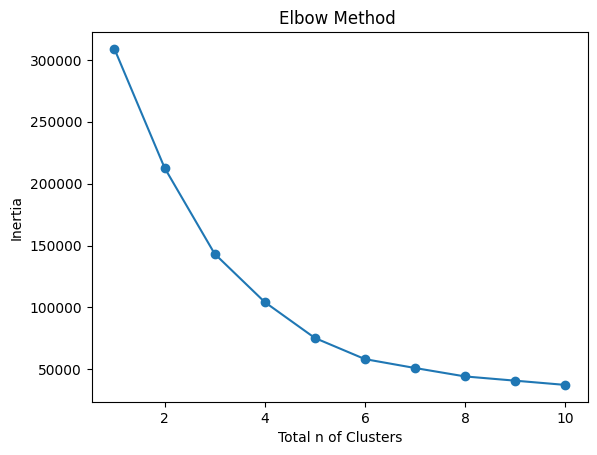

In [ ]:
indiviual_cluster = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,  random_state = 42)
  kmeans.fit(data)
  indiviual_cluster.append(kmeans.inertia_)

plt.plot(range(1,11), indiviual_cluster, marker = 'o')
plt.title('Elbow Method ')
plt.xlabel('Total n of Clusters')
plt.ylabel('Inertia')
plt.show()


optimal_clusters: This variable holds the number of clusters you determined to be optimal based on the elbow method or other techniques.

KMeans: The KMeans class from scikit-learn is instantiated. You provide the n_clusters parameter, which indicates the number of clusters you want the algorithm to create. The random_state parameter ensures reproducibility.

In [ ]:
optimal_clusters = 5
kmeans = KMeans(n_clusters = optimal_clusters , random_state = 42)
cluster_labels = kmeans.fit_predict(data)

data['cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-45-e53e8d5b924c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = cluster_labels


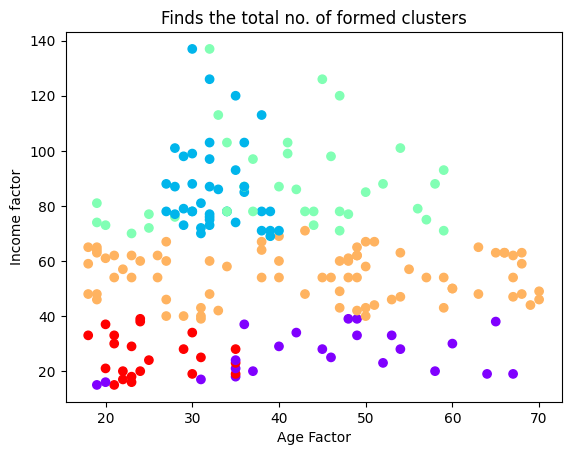

In [ ]:
plt.scatter(data['Age'], data['Annual Income (k$)'] , c = cluster_labels , cmap = 'rainbow')
plt.xlabel('Age Factor')
plt.ylabel('Income factor')
plt.title('Finds the total no. of formed clusters')
plt.show()


The silhouette score is a metric used to evaluate the quality of clusters in a clustering analysis. It measures how close each sample in one cluster is to the samples in the neighboring clusters. The silhouette score ranges from -1 to 1, where a higher value indicates better-defined and well-separated clusters.

In [ ]:
silhouette_avg = silhouette_score(data, cluster_labels)
print("Resulted Silhoutte score is : ", silhouette_avg)

Resulted Silhoutte score is :  0.4451590335884062
